In [3]:
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

In [4]:
df_wine.to_csv('F:/wine.txt',sep='|',header=False, index=False)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(
                    X, y, test_size=0.3, random_state=0)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [6]:
pd.DataFrame(data=X_train_std).to_csv('F:/X_train.txt',sep='|',header=False, index=False)
pd.DataFrame(data=y_train).to_csv('F:/y_train.txt',sep='|',header=False, index=False)

In [7]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eigh(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[ 0.08414846  0.16831254  0.21432212  0.2399553   0.29595018  0.33051429
  0.52251546  0.60181514  0.84906459  1.01233462  1.42809973  2.46635032
  4.8923083 ]


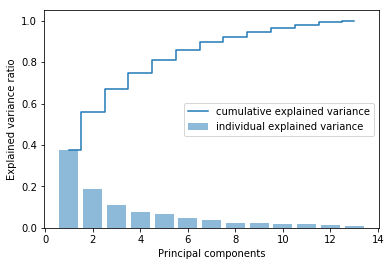

In [8]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt
plt.bar(range(1,14), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid',
        label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [9]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i])
               for i in range(len(eigen_vals))]
eigen_pairs.sort(reverse=True)

In [10]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[-0.14669811  0.50417079]
 [ 0.24224554  0.24216889]
 [ 0.02993442  0.28698484]
 [ 0.25519002 -0.06468718]
 [-0.12079772  0.22995385]
 [-0.38934455  0.09363991]
 [-0.42326486  0.01088622]
 [ 0.30634956  0.01870216]
 [-0.30572219  0.03040352]
 [ 0.09869191  0.54527081]
 [-0.30032535 -0.27924322]
 [-0.36821154 -0.174365  ]
 [-0.29259713  0.36315461]]


In [11]:
X_train_pca = X_train_std.dot(w)

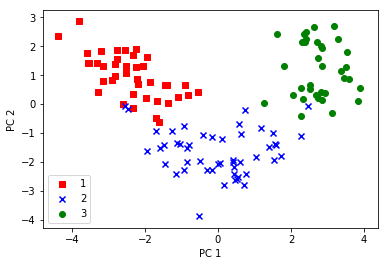

In [12]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0],
                X_train_pca[y_train==l, 1],
                c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='best')
plt.show()

In [13]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

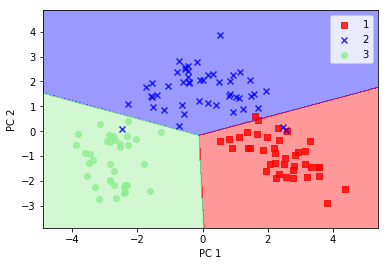

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
lr = LogisticRegression()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='best')
plt.show()

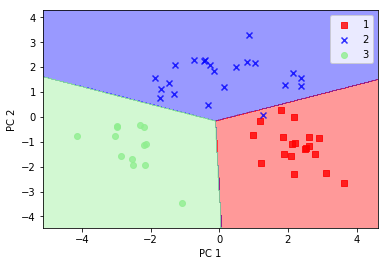

In [15]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='best')
plt.show()

In [16]:
np.set_printoptions(precision=4)
mean_vecs = {}
for label in np.unique(y_train):
    mean_vecs[label] = np.mean(X_train_std[y_train==label], axis=0)
    print('MV %s: %s\n' % (label, mean_vecs[label]))

MV 1: [ 0.9259 -0.3091  0.2592 -0.7989  0.3039  0.9608  1.0515 -0.6306  0.5354
  0.2209  0.4855  0.798   1.2017]

MV 2: [-0.8727 -0.3854 -0.4437  0.2481 -0.2409 -0.1059  0.0187 -0.0164  0.1095
 -0.8796  0.4392  0.2776 -0.7016]

MV 3: [ 0.1637  0.8929  0.3249  0.5658 -0.01   -0.9499 -1.228   0.7436 -0.7652
  0.979  -1.1698 -1.3007 -0.3912]



In [17]:
d = 13 # number of features
S_W = np.zeros((d, d))
for key, value in mean_vecs.items():
    class_scatter = np.zeros((d, d))
    for row in X_train_std[y_train==label]:
        row, mv = row.reshape(d, 1), value.reshape(d, 1)
        class_scatter += (row-mv).dot((row-mv).T)
    S_W += class_scatter

print('Within-class scatter matrix: %sx%s'
      % (S_W.shape[0], S_W.shape[1]))

Within-class scatter matrix: 13x13


In [18]:
print('Class label distribution: %s' % np.bincount(y_train)[1:])

Class label distribution: [40 49 35]


In [19]:
d = 13
S_W = np.zeros((d, d))
for label in np.unique(y_train):
    class_scatter = np.cov(X_train_std[y_train==label].T)
    S_W += class_scatter
print('Scaled within-class scatter matrix: %sx%s'
      % (S_W.shape[0], S_W.shape[1]))

Scaled within-class scatter matrix: 13x13


In [20]:
mean_overall = np.mean(X_train_std, axis=0).reshape(d, 1)
d = 13
S_B = np.zeros((d, d))
for key, value in mean_vecs.items():
    n = X_train_std[y_train==key, :].shape[0]
    m = value.reshape(d, 1) - mean_overall
    S_B += n * m.dot(m.T)
print('Between-class scatter matrix: %sx%s' 
      % (S_B.shape[0], S_B.shape[1]))

Between-class scatter matrix: 13x13


In [21]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [22]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)
print('Eigenvalues in decreasing order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in decreasing order:

452.721581245
156.43636122
7.05575044266e-14
5.68434188608e-14
3.41129233161e-14
3.40797229523e-14
3.40797229523e-14
1.16775565372e-14
1.16775565372e-14
8.59477909861e-15
8.59477909861e-15
4.24523361436e-15
2.6858909629e-15


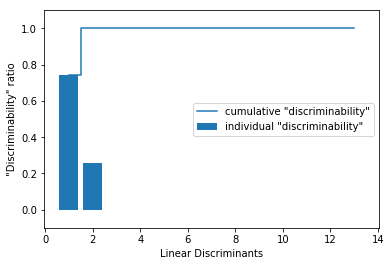

In [23]:
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)
plt.bar(range(1, 14), discr, align='center', label='individual "discriminability"')
plt.step(range(1, 14), cum_discr, where='mid', label='cumulative "discriminability"')
plt.ylabel('"Discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.show()

In [24]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
               eigen_pairs[1][1][:, np.newaxis].real))
print('Matrix W:\n', w)

Matrix W:
 [[-0.0662 -0.3797]
 [ 0.0386 -0.2206]
 [-0.0217 -0.3816]
 [ 0.184   0.3018]
 [-0.0034  0.0141]
 [ 0.2326  0.0234]
 [-0.7747  0.1869]
 [-0.0811  0.0696]
 [ 0.0875  0.1796]
 [ 0.185  -0.284 ]
 [-0.066   0.2349]
 [-0.3805  0.073 ]
 [-0.3285 -0.5971]]


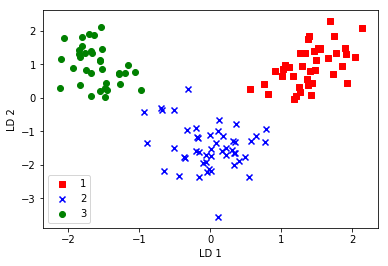

In [25]:
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train==l, 0]*(-1),
                X_train_lda[y_train==l, 1]*(-1),
                c=c, label=l, marker=m)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='best')
plt.show()

In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

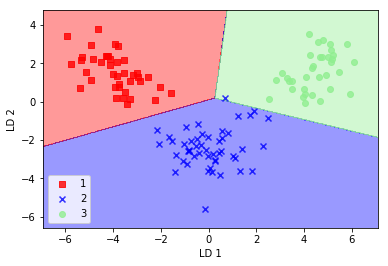

In [27]:
lr = LogisticRegression()
lr = lr.fit(X_train_lda, y_train)
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='best')
plt.show()

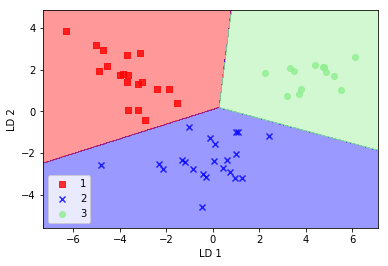

In [28]:
X_test_lda = lda.transform(X_test_std)
plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='best')
plt.show()

In [29]:
print('Using kernel principal component analysis for nonlinear mappings')

Using kernel principal component analysis for nonlinear mappings


In [30]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

def rbf_kernel_pca(X, gamma, n_components):
    """
    RBF kernel PCA impoementation.
    
    Parameters
    ----------
    X: {NumPy ndarray}, shape = [n_samples, n_features]
    
    gamma: float
      Tuning parameter of the RBF kernel
      
    n_components: int
      Number of principal componenets to return
      
    Returns
    -------
    X_pc: {NumPy ndarray}, shape = [n_samples, k_features]
      Projected dataset
      
    """
    #Calculate pairwise squared Euclidean distances in the MxN dimensional dataset.
    sq_dists = pdist(X, 'sqeuclidean')
    
    #Convert pairwise distances into a square matrix.
    mat_sq_dists = squareform(sq_dists)
    
    #Compute the symmetric kernel matrix.
    K = exp(-gamma * mat_sq_dists)
    
    #Center the kernel matrix
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    #Obtaining eigenpairs from the centered kernel matrix
    #numpy.eigh returns them in sorted order
    eig_vals, eig_vecs = eigh(K)
    
    #Collect the top k eigenvectors (projected samples)
    X_pc = np.column_stack((eig_vecs[:, -i] for i in range(1, n_components + 1)))
    
    return X_pc

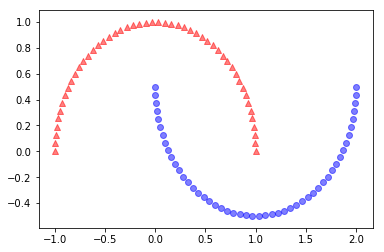

In [31]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=100, random_state=123)
X_std = StandardScaler().fit_transform(X)
plt.scatter(X[y==0, 0], X[y==0, 1], color = 'red', marker = '^', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color = 'blue', marker = 'o', alpha=0.5)
plt.show()

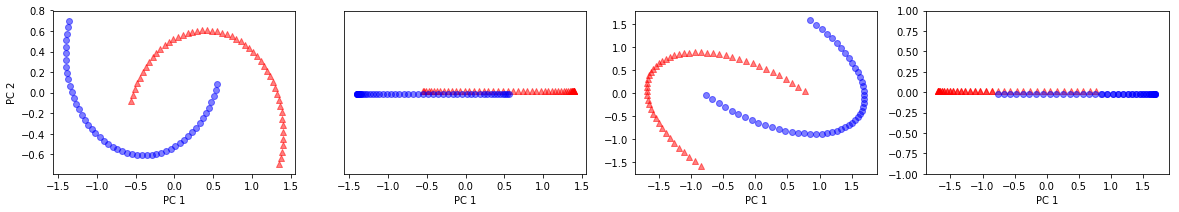

In [32]:
from sklearn.decomposition import PCA
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)
X_std_spca = scikit_pca.fit_transform(X_std)
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20,3))
ax[0].scatter(X_spca[y==0, 0], X_spca[y==0,1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y==1, 0], X_spca[y==1,1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_spca[y==0, 0], np.zeros((50,1))+0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y==1, 0], np.zeros((50,1))-0.02, color='blue', marker='o', alpha=0.5)
ax[2].scatter(X_std_spca[y==0, 0], X_std_spca[y==0,1], color='red', marker='^', alpha=0.5)
ax[2].scatter(X_std_spca[y==1, 0], X_std_spca[y==1,1], color='blue', marker='o', alpha=0.5)
ax[3].scatter(X_std_spca[y==0, 0], np.zeros((50,1))+0.02, color='red', marker='^', alpha=0.5)
ax[3].scatter(X_std_spca[y==1, 0], np.zeros((50,1))-0.02, color='blue', marker='o', alpha=0.5)


ax[0].set_xlabel('PC 1')
ax[0].set_ylabel('PC 2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC 1')
ax[2].set_xlabel('PC 1')
ax[3].set_xlabel('PC 1')
ax[3].set_ylim([-1, 1])

plt.show()

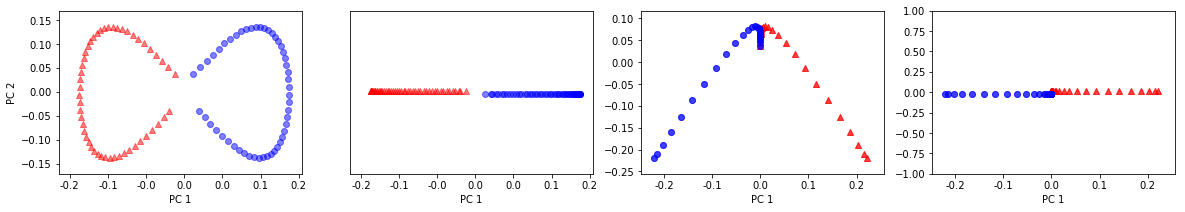

In [33]:
from matplotlib.ticker import FormatStrFormatter
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)
X_std_kpca = rbf_kernel_pca(X_std, gamma=15, n_components=2)
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20,3))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0, 0], np.zeros((50,1))+0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((50,1))-0.02, color='blue', marker='o', alpha=0.5)
ax[2].scatter(X_std_kpca[y==0, 0], X_std_kpca[y==0,1], color='red', marker='^', alpha=0.5)
ax[2].scatter(X_std_kpca[y==1, 0], X_std_kpca[y==1,1], color='blue', marker='o', alpha=0.5)
ax[3].scatter(X_std_kpca[y==0, 0], np.zeros((50,1))+0.02, color='red', marker='^', alpha=0.5)
ax[3].scatter(X_std_kpca[y==1, 0], np.zeros((50,1))-0.02, color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC 1')
ax[0].set_ylabel('PC 2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC 1')
ax[2].set_xlabel('PC 1')
ax[3].set_xlabel('PC 1')
ax[3].set_ylim([-1, 1])

ax[0].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax[1].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax[2].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax[3].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
plt.show()

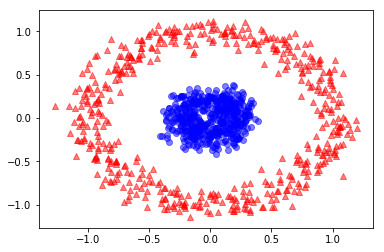

In [34]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)
X_std = StandardScaler().fit_transform(X)
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', marker='o', alpha=0.5)
plt.show()

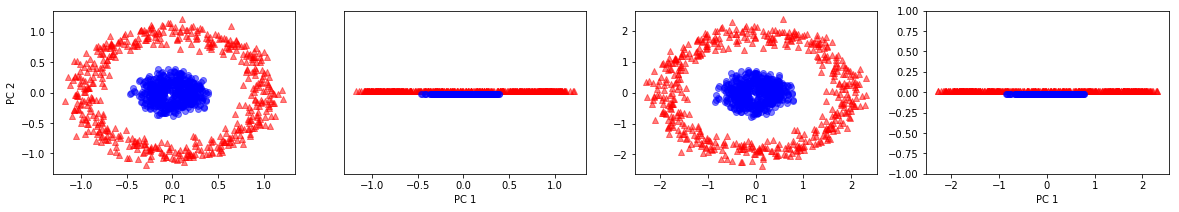

In [35]:
from sklearn.decomposition import PCA
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)
X_std_spca = scikit_pca.fit_transform(X_std)
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20,3))
ax[0].scatter(X_spca[y==0, 0], X_spca[y==0,1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y==1, 0], X_spca[y==1,1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_spca[y==0, 0], np.zeros((500,1))+0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y==1, 0], np.zeros((500,1))-0.02, color='blue', marker='o', alpha=0.5)
ax[2].scatter(X_std_spca[y==0, 0], X_std_spca[y==0,1], color='red', marker='^', alpha=0.5)
ax[2].scatter(X_std_spca[y==1, 0], X_std_spca[y==1,1], color='blue', marker='o', alpha=0.5)
ax[3].scatter(X_std_spca[y==0, 0], np.zeros((500,1))+0.02, color='red', marker='^', alpha=0.5)
ax[3].scatter(X_std_spca[y==1, 0], np.zeros((500,1))-0.02, color='blue', marker='o', alpha=0.5)


ax[0].set_xlabel('PC 1')
ax[0].set_ylabel('PC 2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC 1')
ax[2].set_xlabel('PC 1')
ax[3].set_xlabel('PC 1')
ax[3].set_ylim([-1, 1])

plt.show()

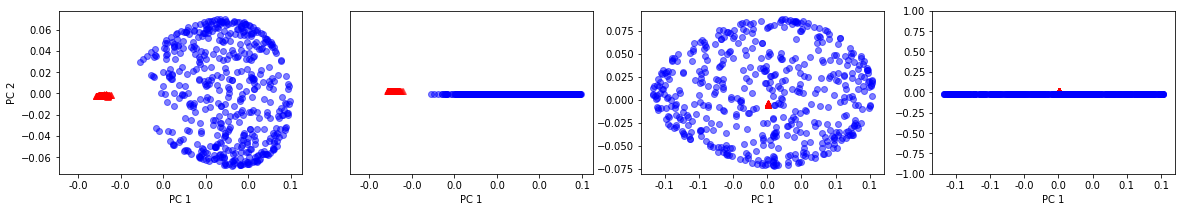

In [36]:
from sklearn.decomposition import PCA
scikit_pca = PCA(n_components=2)
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)
X_std_kpca = rbf_kernel_pca(X_std, gamma=15, n_components=2)
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20,3))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0,1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1,1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0, 0], np.zeros((500,1))+0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((500,1))-0.02, color='blue', marker='o', alpha=0.5)
ax[2].scatter(X_std_kpca[y==0, 0], X_std_kpca[y==0,1], color='red', marker='^', alpha=0.5)
ax[2].scatter(X_std_kpca[y==1, 0], X_std_kpca[y==1,1], color='blue', marker='o', alpha=0.5)
ax[3].scatter(X_std_kpca[y==0, 0], np.zeros((500,1))+0.02, color='red', marker='^', alpha=0.5)
ax[3].scatter(X_std_kpca[y==1, 0], np.zeros((500,1))-0.02, color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC 1')
ax[0].set_ylabel('PC 2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC 1')
ax[2].set_xlabel('PC 1')
ax[3].set_xlabel('PC 1')
ax[3].set_ylim([-1, 1])

ax[0].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax[1].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax[2].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax[3].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
plt.show()

In [37]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

def rbf_kernel_pca(X, gamma, n_components):
    """
    RBF kernel PCA impoementation.
    
    Parameters
    ----------
    X: {NumPy ndarray}, shape = [n_samples, n_features]
    
    gamma: float
      Tuning parameter of the RBF kernel
      
    n_components: int
      Number of principal componenets to return
      
    Returns
    -------
    X_pc: {NumPy ndarray}, shape = [n_samples, k_features]
      Projected dataset
      
    lambdas: list
      Eigenvalues
      
    """
    #Calculate pairwise squared Euclidean distances in the MxN dimensional dataset.
    sq_dists = pdist(X, 'sqeuclidean')
    
    #Convert pairwise distances into a square matrix.
    mat_sq_dists = squareform(sq_dists)
    
    #Compute the symmetric kernel matrix.
    K = exp(-gamma * mat_sq_dists)
    
    #Center the kernel matrix
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    #Obtaining eigenpairs from the centered kernel matrix
    #numpy.eigh returns them in sorted order
    eig_vals, eig_vecs = eigh(K)
    
    #Collect the top k eigenvectors (projected samples)
    alphas = np.column_stack((eig_vecs[:, -i] for i in range(1, n_components + 1)))
    
    #Collect the corresponding eignevalues
    lambdas = [eig_vals[-i] for i in range(1, n_components+1)]
    
    return alphas, lambdas

In [38]:
X, y = make_moons(n_samples=100, random_state=123)
alphas, lambdas = rbf_kernel_pca(X, gamma=15, n_components=1)

In [39]:
x_new = X[25]
x_new

array([ 1.8713,  0.0093])

In [40]:
x_proj = alphas[25] # original projection
x_proj

array([ 0.0788])

In [41]:
def project_x(x_new, X, gamma, alphas, lambdas):
    pair_dist = np.array([np.sum((x_new-row)**2) for row in X])
    k = np.exp(-gamma * pair_dist)
    return k.dot(alphas / lambdas)

In [42]:
x_reproj = project_x(x_new, X, gamma=15, alphas=alphas, lambdas=lambdas)
x_reproj

array([ 0.0788])

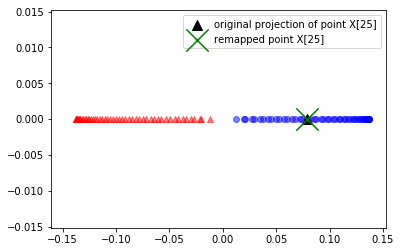

In [43]:
plt.scatter(alphas[y==0, 0], np.zeros((50)), color='red', marker='^',alpha=0.5)
plt.scatter(alphas[y==1, 0], np.zeros((50)), color='blue', marker='o', alpha=0.5)
plt.scatter(x_proj, 0, color='black', label='original projection of point X[25]', marker='^', s=100)
plt.scatter(x_reproj, 0, color='green', label='remapped point X[25]', marker='x', s=500)
plt.legend(scatterpoints=1)
plt.show()

In [44]:
from sklearn.decomposition import KernelPCA
X, y = make_moons(n_samples=100, random_state=123)
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_scikit_pca = scikit_kpca.fit_transform(X)

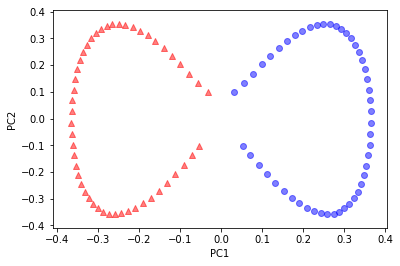

In [45]:
plt.scatter(X_scikit_pca[y==0, 0], X_scikit_pca[y==0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X_scikit_pca[y==1, 0], X_scikit_pca[y==1, 1], color='blue', marker='o', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

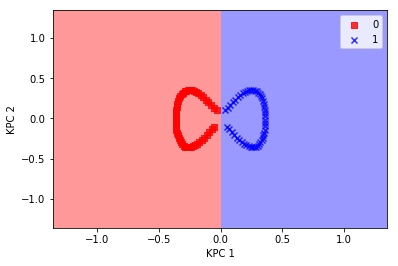

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr = lr.fit(X_scikit_pca, y)
y_pred = lr.predict(X_scikit_pca)
accuracy_score(y, y_pred)

plot_decision_regions(X_scikit_pca, y, classifier=lr)
plt.xlabel('KPC 1')
plt.ylabel('KPC 2')
plt.legend(loc='best')
plt.show()

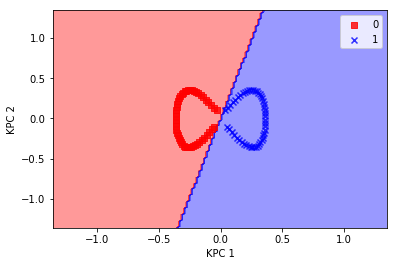

In [47]:
from sklearn.linear_model import Perceptron
perc = Perceptron(penalty='l2', eta0 = 0.001)
perc = perc.fit(X_scikit_pca, y)
y_pred = perc.predict(X_scikit_pca)
accuracy_score(y, y_pred)

plot_decision_regions(X_scikit_pca, y, classifier=perc)
plt.xlabel('KPC 1')
plt.ylabel('KPC 2')
plt.legend(loc='best')
plt.show()

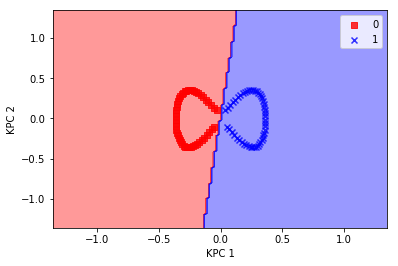

In [48]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(eta0 = 0.001)
sgd = sgd.fit(X_scikit_pca, y)
y_pred = perc.predict(X_scikit_pca)
accuracy_score(y, y_pred)

plot_decision_regions(X_scikit_pca, y, classifier=sgd)
plt.xlabel('KPC 1')
plt.ylabel('KPC 2')
plt.legend(loc='best')
plt.show()